## Welcome to Hands On P6!

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("telco.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Imbalance Problem

In [4]:
## Check the proportion of 0 and 1 in Churn label
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

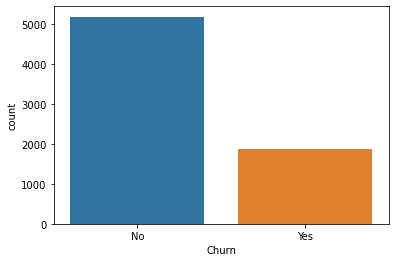

In [5]:
import seaborn as sns

sns.countplot(df["Churn"])

#### - Oversampling

In [6]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Churn']=="No")] 
df_minority = df[(df['Churn']=="Yes")]

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 5174, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [7]:
df_upsampled["Churn"].value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

#### - Undersampling

In [8]:
# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1869, # to match minority class
                                 random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [9]:
df_downsampled["Churn"].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

### Preparing Dataset for Modelling

In [10]:
# take only some columns from the imbalance (original) dataset
df = df[["gender", "SeniorCitizen", "tenure", "Contract", "MonthlyCharges", "TotalCharges", "Churn"]]

In [11]:
# Convert the "Yes" and "No" value into 1 and 0
df.loc[df["Churn"] == "No", "Churn"] = 0
df.loc[df["Churn"] == "Yes", "Churn"] = 1

In [12]:
df.head()

,gender,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,Month-to-month,29.85,29.85,0
1,Male,0,34,One year,56.95,1889.5,0
2,Male,0,2,Month-to-month,53.85,108.15,1
3,Male,0,45,One year,42.30,1840.75,0
4,Female,0,2,Month-to-month,70.70,151.65,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   SeniorCitizen   7043 non-null   int64  
 2   tenure          7043 non-null   int64  
 3   Contract        7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   object 
 6   Churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 385.3+ KB


In [14]:
# Clean the dataset
df =df[~(df["TotalCharges"]== " ")]
df["MonthlyCharges"] = df["MonthlyCharges"].astype("float")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df["Churn"] = df["Churn"].astype("int")

#### Encoding

In [15]:
#one hot encoding
df = pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,29.85,29.85,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,1,1,0,0
3,0,45,42.30,1840.75,0,0,1,0,1,0
4,0,2,70.70,151.65,1,1,0,1,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7032 non-null   int64  
 1   tenure                   7032 non-null   int64  
 2   MonthlyCharges           7032 non-null   float64
 3   TotalCharges             7032 non-null   float64
 4   Churn                    7032 non-null   int32  
 5   gender_Female            7032 non-null   uint8  
 6   gender_Male              7032 non-null   uint8  
 7   Contract_Month-to-month  7032 non-null   uint8  
 8   Contract_One year        7032 non-null   uint8  
 9   Contract_Two year        7032 non-null   uint8  
dtypes: float64(2), int32(1), int64(2), uint8(5)
memory usage: 336.5 KB


#### Train Test Split

In [17]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [18]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

### Modelling

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
## Decision Tree

In [21]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [22]:
## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

### Evaluation

In [24]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print("Akurasi LR:", accuracy_score(y_test, y_lr))
print("Akurasi DT:",accuracy_score(y_test, y_dtree))
print("Akurasi RF:",accuracy_score(y_test, y_rf))

Akurasi LR: 0.7842161393530039
Akurasi DT: 0.7170280838961962
Akurasi RF: 0.7870600782083185


In [26]:
from sklearn.metrics import precision_score

print("Precision LR:",precision_score(y_test, y_lr, average='macro'))
print("Precision DT:",precision_score(y_test, y_dtree, average='macro'))
print("Precision RF:",precision_score(y_test, y_rf, average='macro'))

Precision LR: 0.7198433114877163
Precision DT: 0.6383123912453104
Precision RF: 0.7278021805631814


In [27]:
from sklearn.metrics import recall_score

print("Recall LR:",recall_score(y_test, y_lr, average='macro'))
print("Recall DT:",recall_score(y_test, y_dtree, average='macro'))
print("Recall RF:",recall_score(y_test, y_rf, average='macro'))

Recall LR: 0.6834659688883122
Recall DT: 0.6441812048079079
Recall RF: 0.6712876133857061


In [28]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix LR:\n",confusion_matrix(y_test, y_lr))
print("Confusion Matrix DT:\n",confusion_matrix(y_test, y_dtree))
print("Confusion Matrix RF:\n",confusion_matrix(y_test, y_rf))

Confusion Matrix LR:
 [[1859  220]
 [ 387  347]]
Confusion Matrix DT:
 [[1656  423]
 [ 373  361]]
Confusion Matrix RF:
 [[1899  180]
 [ 419  315]]


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


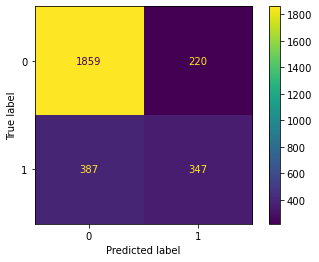

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix Linear Regression
cm_lr = confusion_matrix(y_test, y_lr)
ConfusionMatrixDisplay(cm_lr, lr.classes_).plot()

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


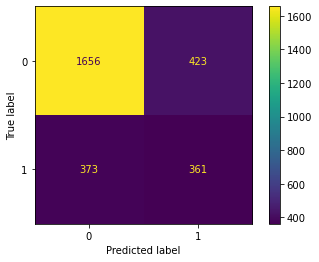

In [30]:
# Confusion Matrix Decision Tree
cm_dt = confusion_matrix(y_test, y_dtree)
ConfusionMatrixDisplay(cm_dt, dtree.classes_).plot()

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass display_labels=[0 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


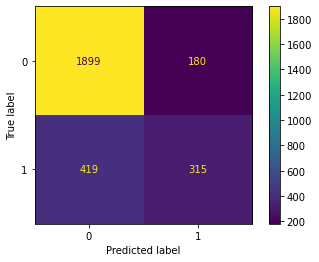

In [31]:
# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_rf)
ConfusionMatrixDisplay(cm_rf, rf.classes_).plot()

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print("AUC-ROC LR:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print("AUC-ROC DT:", auc(fpr, tpr))

fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print("AUC-ROC RF:", auc(fpr, tpr))

AUC-ROC LR: 0.6834659688883122
AUC-ROC DT: 0.6441812048079077
AUC-ROC RF: 0.6712876133857061


In [33]:
from sklearn.metrics import classification_report
print("Linear Regression:\n", classification_report(y_test, y_lr))
print("Decision Tree:\n", classification_report(y_test, y_dtree))
print("Random Forest:\n", classification_report(y_test, y_rf))

Linear Regression:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2079
           1       0.61      0.47      0.53       734

    accuracy                           0.78      2813
   macro avg       0.72      0.68      0.70      2813
weighted avg       0.77      0.78      0.77      2813

Decision Tree:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2079
           1       0.46      0.49      0.48       734

    accuracy                           0.72      2813
   macro avg       0.64      0.64      0.64      2813
weighted avg       0.72      0.72      0.72      2813

Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      2079
           1       0.64      0.43      0.51       734

    accuracy                           0.79      2813
   macro avg       0.73      0.67      0.69      2813
weighted avg       0.7